<a href="https://colab.research.google.com/github/repitta/CienciaDeDadosEducacionais/blob/master/An%C3%A1lise_LopUsuarioNota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as Bibliotecas**

In [0]:
import pandas as pd
from csv import reader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Lendo o arquivo CSV lopUsuarioNota**

In [0]:
# Ler o arquivo CSV 
lopNotas  = pd.read_csv("https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/arquivosCSV/lopUsuarioNota.csv")

**Estrutura do aquivo**

In [0]:
print(lopNotas.info())
lopNotas.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7654 entries, 0 to 7653
Data columns (total 10 columns):
Unnamed: 0        7654 non-null int64
titulo            7654 non-null object
idAluno           7654 non-null object
questoesFeitas    7654 non-null int64
quantidade        7654 non-null int64
NotaLista         7654 non-null float64
ano               7654 non-null float64
descricaoTurma    7654 non-null object
idTurma           7654 non-null object
matricula         7654 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 598.0+ KB
None


,Unnamed: 0,titulo,idAluno,questoesFeitas,quantidade,NotaLista,ano,descricaoTurma,idTurma,matricula
0,0,Lista de Exercícios 1 - Expressões e variáveis,5991cb910be9d42f2f68b906,11,15,73.333333,2017.2,LÓGICA DE PROGRAMAÇÃO - Turma 01A,598e15296d8650eb27d52e3d,20170039453
1,1,Lista de Exercícios 1 - Expressões e variáveis,5991cd1a8907ca2f441cd313,5,15,33.333333,2017.2,LÓGICA DE PROGRAMAÇÃO - Turma 01B,598e15296d8650eb27d52e5f,20170038394
2,2,Lista de Exercícios 1 - Expressões e variáveis,5991cd34b3c8b42f3d5da3fd,6,15,40.000000,2017.2,LÓGICA DE PROGRAMAÇÃO - Turma 01B,598e15296d8650eb27d52e5f,20170001812
3,3,Lista de Exercícios 1 - Expressões e variáveis,5991cd37b3c8b42f3d5da3fe,4,15,26.666667,2017.2,LÓGICA DE PROGRAMAÇÃO - Turma 01B,598e15296d8650eb27d52e5f,20170102735
4,4,Lista de Exercícios 1 - Expressões e variáveis,5991cd39b3c8b42f3d5da3ff,2,15,13.333333,2017.2,LÓGICA DE PROGRAMAÇÃO - Turma 01B,598e15296d8650eb27d52e5f,20170043590


**Pré-processamento**

In [0]:
#excluir a coluna Unnamed
lopNotas = lopNotas[['titulo', 'idAluno', 'questoesFeitas', 'quantidade','NotaLista', 'ano', 'descricaoTurma', 'idTurma', 'matricula']]
#dividir a coluna NotasLista por 10 , pq elas estão em porcentagem
lopNotas["NotaLista"] = lopNotas["NotaLista"] /10

**Turmas que estão cadastradas por ano**

In [0]:
lopNotas.loc[lopNotas["ano"] == 2019.1 ,"descricaoTurma"].unique()

array(['LÓGICA DE PROGRAMAÇÃO - Turma 01D',
       'LÓGICA DE PROGRAMAÇÃO - Turma 02D',
       'LÓGICA DE PROGRAMAÇÃO - Turma 02A',
       'LÓGICA DE PROGRAMAÇÃO - Turma 02C',
       'LÓGICA DE PROGRAMAÇÃO - Turma 01A',
       'LÓGICA DE PROGRAMAÇÃO - Turma 02B',
       'LÓGICA DE PROGRAMAÇÃO - Turma 01C',
       'LÓGICA DE PROGRAMAÇÃO - Turma 01B'], dtype=object)

**Tabela de notas e quantidade de questões feitas por aluno por turma por lista**

In [0]:
notasTurma = lopNotas.loc[(lopNotas["ano"] == 2019.1) & (lopNotas["descricaoTurma"].str.contains("Turma 02C", regex=False)) &
                          (lopNotas["titulo"].str.contains("Lista de Exercícios 1", regex=False)),["matricula","NotaLista","questoesFeitas"]]
notasTurma = notasTurma.sort_values("matricula")
print("Quantidade de alunos que fizeram a lista:", notasTurma.shape[0])
print(notasTurma)


Quantidade de alunos que fizeram a lista: 17
       matricula  NotaLista  questoesFeitas
317  20160142011   0.666667               1
662  20170117540   9.666667              15
221  20170137875   1.333333               2
437  20170137991   2.000000               3
538  20170138184   1.333333               2
537  20180030255   9.333333              14
615  20180039653   9.333333              14
614  20180043950   0.666667               1
607  20180044170   0.666667               1
605  20180087973   6.666667              10
661  20180105982   9.333333              14
475  20180108142   4.000000               6
613  20180109168   6.666667              10
671  20180129527   0.666667               1
542  20180129760   9.106667              14
672  20180136343   0.666667               6
539  20180136503   2.500000              10


**Quantidade de alunos por ano**

In [0]:
a = lopNotas.loc[lopNotas["ano"] == 2017.2,"idAluno"].unique().shape
a

(245,)

**Gráfico para mostrar a quantidade de alunos que enviaram as listas ao longo dos anos**

                                            titulo     ano  ...  idTurma  matricula
0   Lista de Exercícios 1 - Expressões e variáveis  2017.2  ...      128        128
1   Lista de Exercícios 1 - Expressões e variáveis  2018.1  ...      161        161
2   Lista de Exercícios 1 - Expressões e variáveis  2018.2  ...      228        228
3   Lista de Exercícios 1 - Expressões e variáveis  2019.1  ...      162        162
4  Lista de Exercícios 2 - Estruturas Condicionais  2017.2  ...      157        157

[5 rows x 9 columns]
Quantidade de alunos total:  60


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


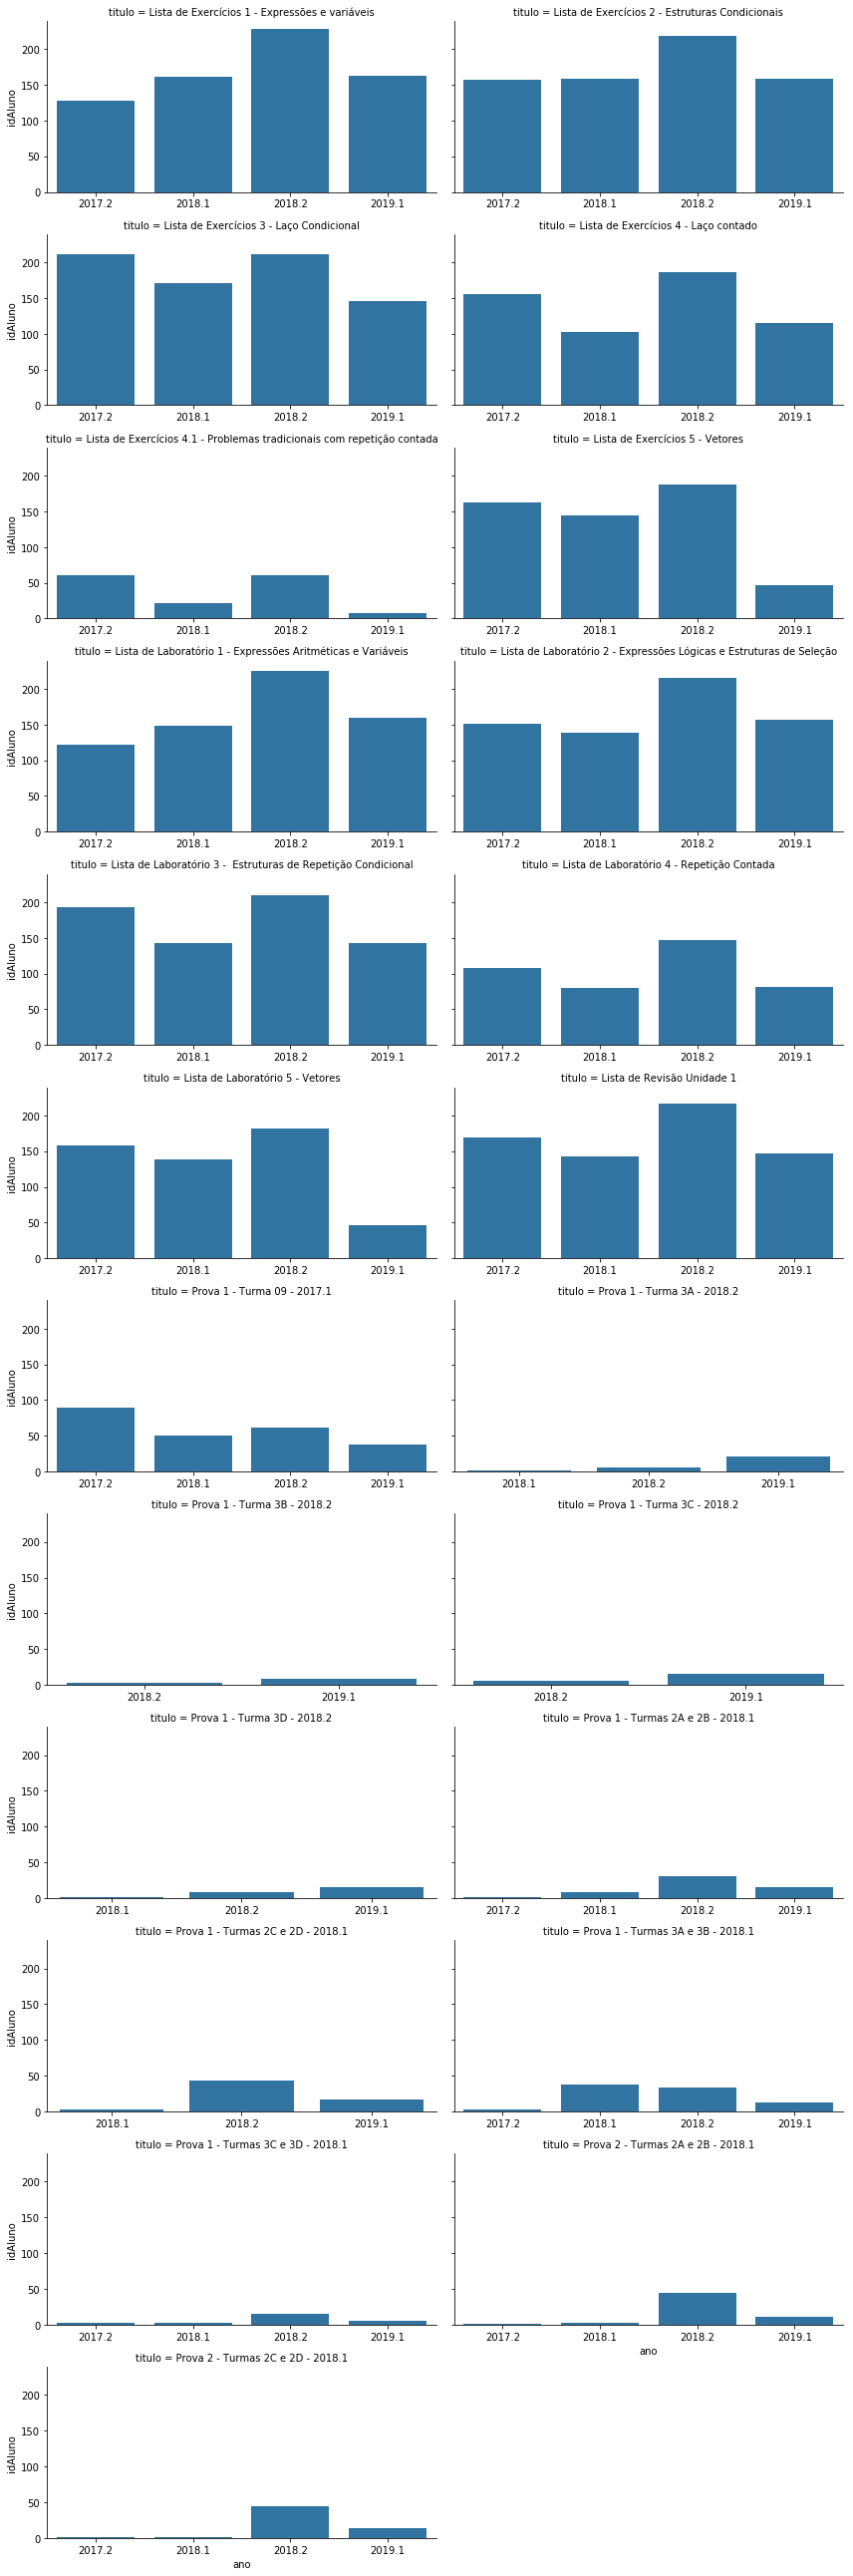

In [0]:
quanLista = lopNotas.groupby(['titulo','ano']).count()
quanLista = quanLista.reset_index()
print(quanLista.head())

# Creating graphics with Seaborn
gQuandLista = sns.FacetGrid(quanLista, col = "titulo", col_wrap=2, height=3, aspect=2, sharex=False)
gQuandLista.map(sns.barplot,"ano", "idAluno")
plt.show()

**Gráfico para mostrar as médias das notas das listas ao longo do tempo**

                                               titulo  NotaLista     ano
0      Lista de Exercícios 1 - Expressões e variáveis  29.687500  2017.2
1      Lista de Exercícios 1 - Expressões e variáveis  38.473706  2018.1
2      Lista de Exercícios 1 - Expressões e variáveis  59.962573  2018.2
3      Lista de Exercícios 1 - Expressões e variáveis  58.493416  2019.1
4     Lista de Exercícios 2 - Estruturas Condicionais  46.316348  2017.2
5     Lista de Exercícios 2 - Estruturas Condicionais  53.554857  2018.1
6     Lista de Exercícios 2 - Estruturas Condicionais  60.854135  2018.2
7     Lista de Exercícios 2 - Estruturas Condicionais  55.577568  2019.1
8            Lista de Exercícios 3 - Laço Condicional  39.219589  2017.2
9            Lista de Exercícios 3 - Laço Condicional  42.455361  2018.1
10           Lista de Exercícios 3 - Laço Condicional  51.890995  2018.2
11           Lista de Exercícios 3 - Laço Condicional  52.315068  2019.1
12               Lista de Exercícios 4 - Laço conta

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


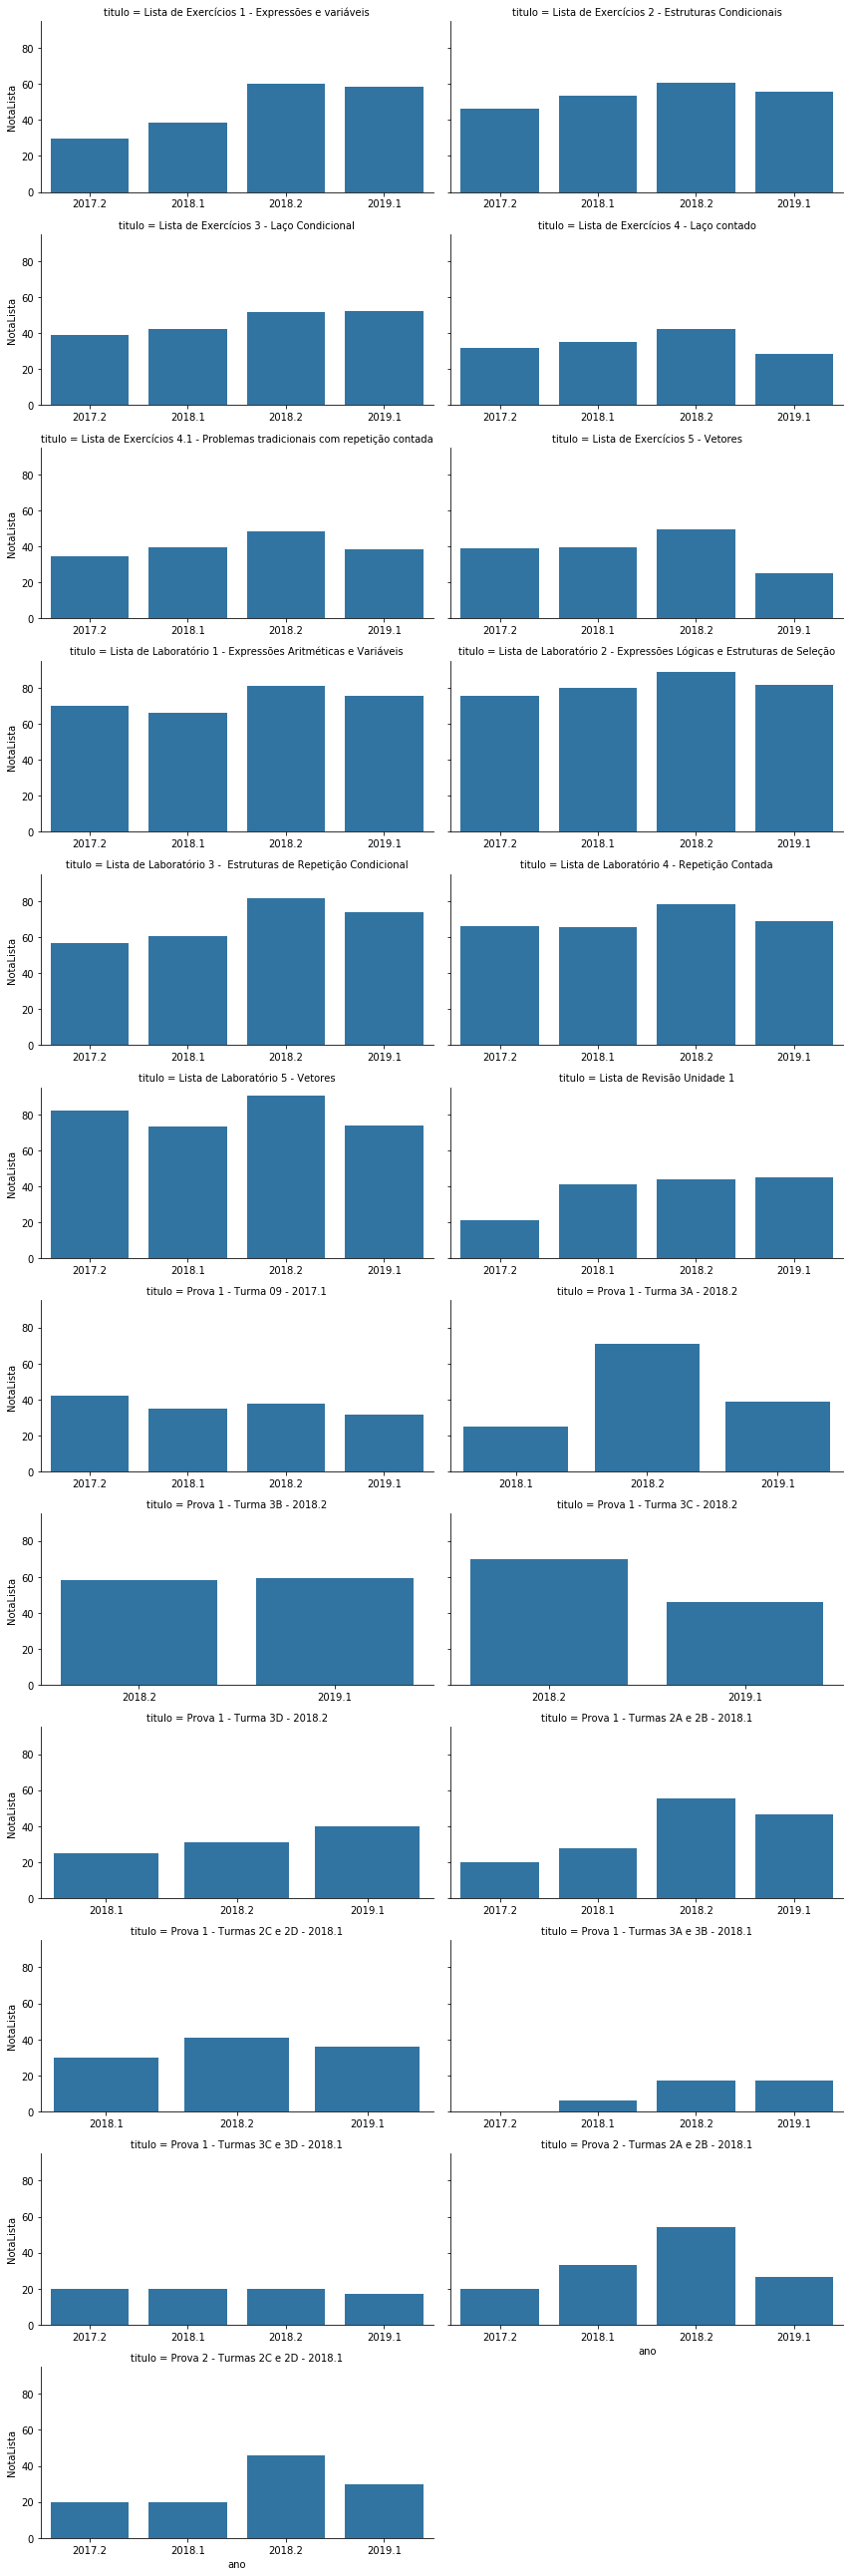

In [0]:
mediaNota = lopNotas.groupby(['titulo','ano'])["NotaLista"].mean()
mediaNota = mediaNota.reset_index()
print(mediaNota[["titulo",'NotaLista',"ano"]])

# Creating graphics with Seaborn
gMediaNota = sns.FacetGrid(mediaNota, col = "titulo", col_wrap=2, height=3, aspect=2, sharex=False)
gMediaNota.map(sns.barplot,"ano", "NotaLista")
plt.show()
